### 주제 : 한국영화 관객 수 예측

#### 동기 /목표 : 영화 흥행에 가장 중요한 요소가 무엇인지 파악하여 최종적으로는 개봉영화 흥행 예측한다

#### 독립변수: 2015~2019년 반기(6개월)별 top 100 영화에 대한  개봉 영화 총 928건 데이터
- 영화속성 
    - 국적(카테고리) : 한국, 미국, 기타 외 58개 국
    - 장르(카테고리) : 코미디, 액션, 스릴러, 멜로 드라마, 공포, 기타 외 22건
    - 관람 등급(카테고리) : 전체관람가, 12세이상관람가, 15세이상관람가, 청소년관람불가('12세이상관람가,15세이상관람가')
    - 감독/배우 효과(수치형) : 최근 3년간 흥행실적, 아카데미 수상 여부로 수치화(처리 예정)
    - 러닝타임(수치형) : 크롤링할 예정
- 경쟁요소 
    - 배급사 파워(수치형) : 배급사작품 개봉이전 3년 배급영화의 관람객수 평균(처리 예정, 현재 449건)
    - 스크린 수(수치형) : 전국 개봉 스크린 수
    - 개봉월
- 구전효과
    - 온라인 평점(수치형) : 네이버의 일반인 평가의 평균 평점(10점 만점, 크롤링 예정)
    - 관련 기사 수(수치형) : 흥행지속여부와 관련하여 개봉일 전후 2주 기간 동안 나온 기사 수(크롤링 예정) 
 
#### 종속변수 
- 전국 관객 수(수치형) : 영화관통합전산망 월별 개봉일람
    - 선정 이유
        - 영화 흥행의 척도는 크게 두 가지 : 관객수, 매출액
        - 미국은 매출액을 기준으로 흥행 순위를 계산하지만 우리나라는 관객수를 기준으로 함
        - 이유1. 매출액을 기준으로 하면 프라임 시간대나 비싼 상영관을 배정받지 못한 영화가 불리함 
        - 이유2. 매출액 기준이면 물가상승률을 고려해야 해서 역대 순위를 매길 때 문제가 될 수 있는데 관객수 기준의 경우 그렇지 않다

#### 자료사이트
- KOBIS(영화관통합전산망) 월별 개봉일람 : http://www.kobis.or.kr/kobis/business/stat/offc/searchOfficHitTotList.do?searchMode=month

### 가설(최소 3가지)
- 배우와 개봉시기가 관객수에 가장 영향을 많이 줄 것이다  
- 장르와 러닝타임이 흥행과 상관관계가 있을 것으로 예상, 중요 흥행 요소가 된다
- 영화는 바이럴마케팅(네이버 기사 수, 네이버평점)의 영향이 크며, 이는 결정적 흥행요소이다

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pylab as plt
import matplotlib as mpl
from matplotlib import rc
import missingno as msno
import warnings
warnings.filterwarnings('ignore')

In [26]:
# matplotlib 한글 사용을 위한 코드
rc('font', family='AppleGothic')

# plt.rcParams['axes.unicode_minus'] = False
# mpl.rc('font', family='Hancom Gothic')
# mpl.rc('axes', unicode_minus=False)

In [14]:
data2015_1 = pd.read_html("KOBIS_개봉일람_2015_1.xls")[1:][0]
data2015_2 = pd.read_html("KOBIS_개봉일람_2015_2.xls")[1:][0]
data2016_1 = pd.read_html("KOBIS_개봉일람_2016_1.xls")[1:][0]
data2016_2 = pd.read_html("KOBIS_개봉일람_2016_2.xls")[1:][0]
data2017_1 = pd.read_html("KOBIS_개봉일람_2017_1.xls")[1:][0]
data2017_2 = pd.read_html("KOBIS_개봉일람_2017_2.xls")[1:][0]
data2018_1 = pd.read_html("KOBIS_개봉일람_2018_1.xls")[1:][0]
data2018_2 = pd.read_html("KOBIS_개봉일람_2018_2.xls")[1:][0]
data2019_1 = pd.read_html("KOBIS_개봉일람_2019_1.xls")[1:][0]
data2019_2 = pd.read_html("KOBIS_개봉일람_2019_2.xls")[1:][0]

In [15]:
#6개월씩 나눠진 데이터에서 top 100 추출
top100_data2015_1 = data2015_1[0:100]
top100_data2015_2 = data2015_2[0:100]
top100_data2016_1 = data2016_1[0:100]
top100_data2016_2 = data2016_2[0:100]
top100_data2017_1 = data2017_1[0:100]
top100_data2017_2 = data2017_2[0:100]
top100_data2018_1 = data2018_1[0:100]
top100_data2018_2 = data2018_2[0:100]
top100_data2019_1 = data2019_1[0:100]
top100_data2019_2 = data2019_2[0:100]

In [16]:
# 반기별 top 100 영화데이터들 합치기
top_movie_data = pd.concat([top100_data2015_1, top100_data2015_2,\
                       top100_data2016_1, top100_data2016_2,\
                       top100_data2017_1, top100_data2017_2,\
                       top100_data2018_1, top100_data2018_2,\
                       top100_data2019_1, top100_data2019_2])
top_movie_data.drop('순번', axis=1, inplace=True)

In [17]:
# top 100 데이터에서 연말, 연초의 중복된 영화명 중복 제거
top_movie_data = top_movie_data.drop_duplicates(["영화명"], keep='first')
top_movie_data = pd.DataFrame.reset_index(top_movie_data)
top_movie_data.drop('index', axis=1, inplace=True)

In [18]:
len(top_movie_data)

928

In [19]:
# 실수값을 갖는 변수들에 대한 정보

top_movie_data.describe()

,전국스크린수,전국매출액,전국관객수,서울매출액,서울관객수
count,928.000000,9.280000e+02,9.280000e+02,9.280000e+02,9.280000e+02
mean,613.606681,8.961981e+09,1.096379e+06,2.414463e+09,2.831861e+05
std,419.281122,1.662837e+10,2.007433e+06,4.366922e+09,5.038901e+05
min,25.000000,2.519903e+08,3.186600e+04,3.015330e+07,4.068000e+03
25%,320.000000,7.604181e+08,9.648675e+04,2.443126e+08,3.004875e+04
50%,511.500000,2.246688e+09,2.853985e+05,6.280804e+08,7.622750e+04
75%,825.500000,8.868206e+09,1.117410e+06,2.259484e+09,2.746215e+05
max,2835.000000,1.396398e+11,1.626336e+07,3.346972e+10,3.638287e+06


In [20]:
# 실수가 아닌 값(문자열)을 갖는 변수들에 대한 정보

top_movie_data.describe(include='object')

,영화명,감독,제작사,수입사,배급사,개봉일,영화유형,영화형태,국적,장르,등급,영화구분
count,928,924,348,585,927,928,928,928,928,928,928,928
unique,928,739,273,94,140,396,1,2,24,19,4,2
top,롱 샷,다라 오코넬,(주)하이브미디어코프,유니버설픽쳐스인터내셔널 코리아(유),씨제이이앤엠(주),2016-01-07,개봉영화,장편,미국,애니메이션,15세이상관람가,일반영화
freq,1,5,5,77,85,7,928,927,396,196,339,712


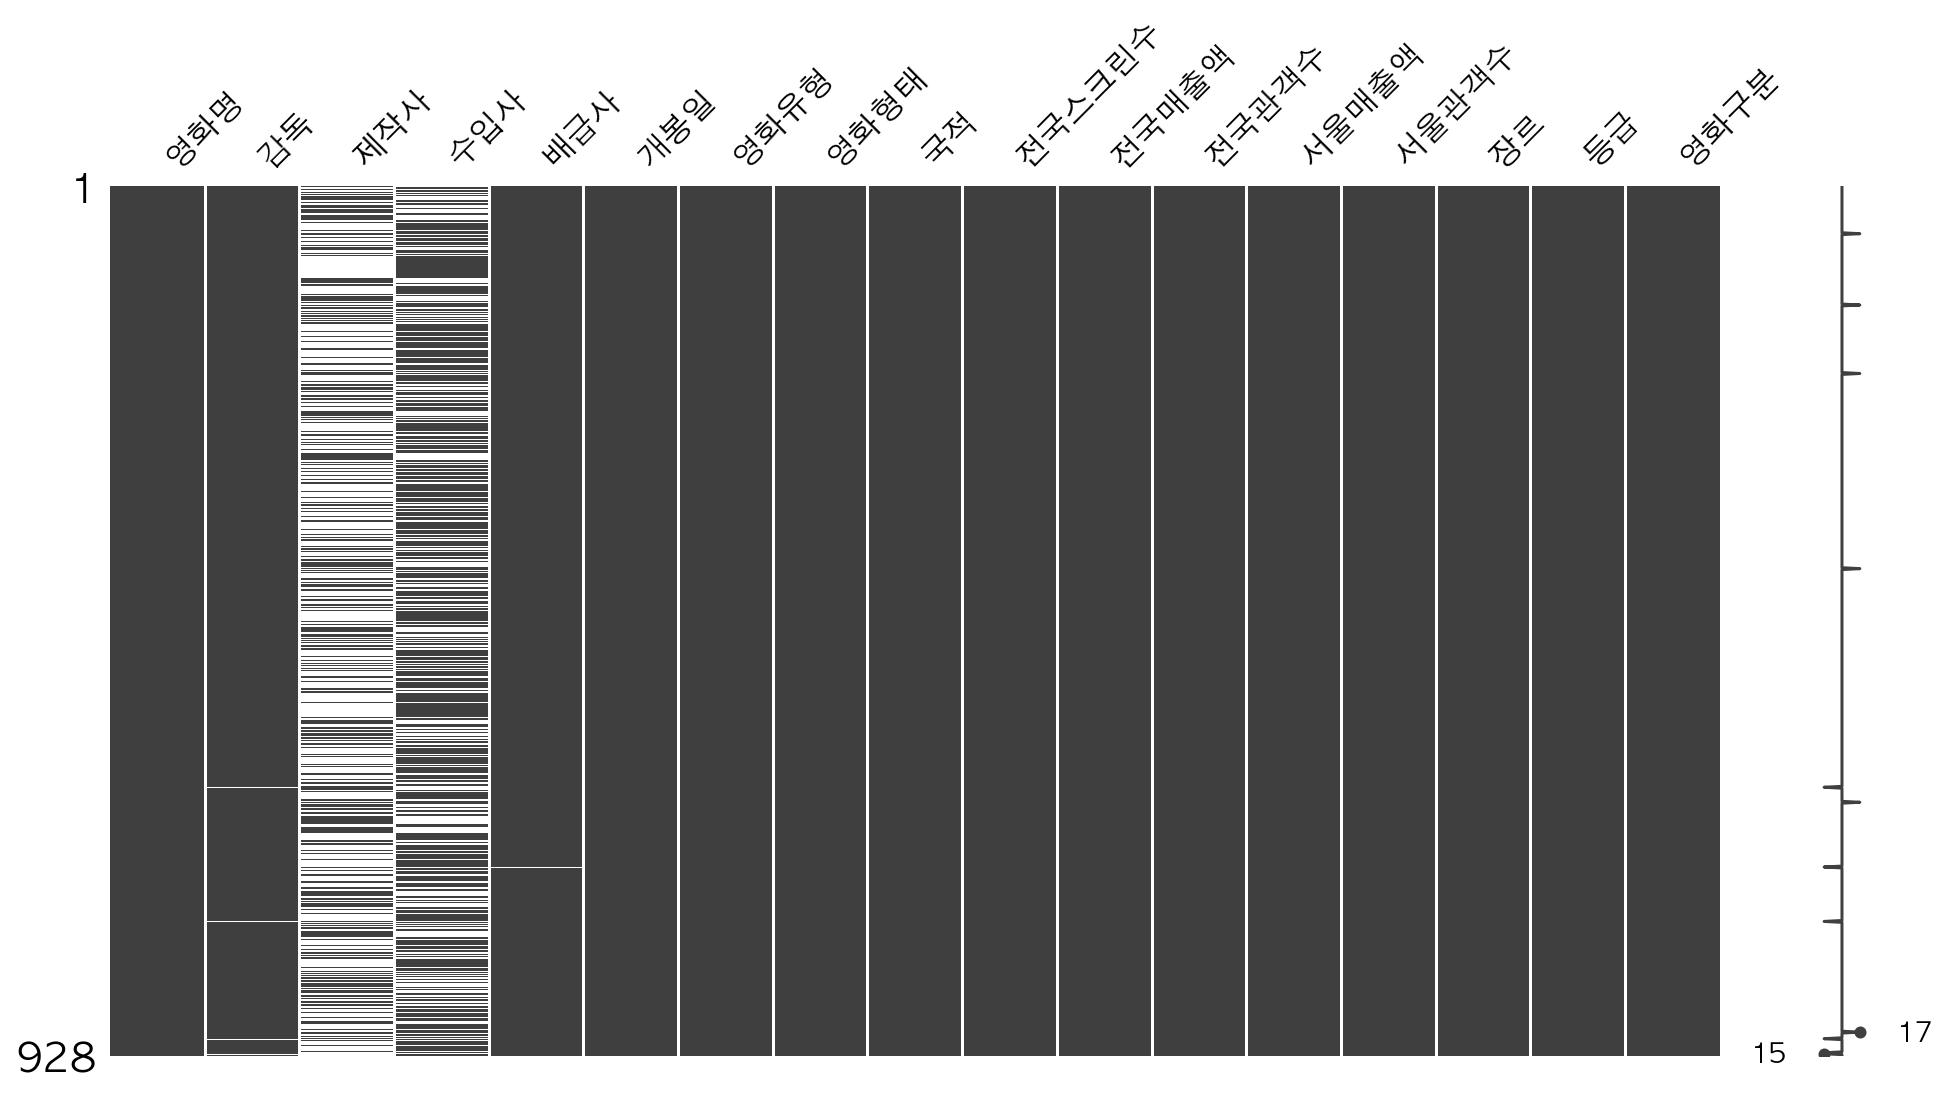

In [27]:
# 결측데이터 확인(시각화)

msno.matrix(top_movie_data, figsize=(16,8))
plt.show()

##### 이슈 1) 제작사랑 배급사 결측데이터가 많아서 두 컬럼 삭제, 배급사만 사용(배급사와 스크린 수 상관관계 있을 것으로 예측)

# 여기서부터 다시 EDA 시작하기

In [28]:



# 스케일링하지 않은 상태의 히스토그램

# movie_data.hist(figsize=(10,10))
# plt.show()

In [29]:
# 로그 씌우기 위해 0인 값들은 전부 1로 바꾸기

int_data = movie_data.select_dtypes(include=['int'])
int_data[int_data == 0] = 1
int_data.tail()

NameError: name 'movie_data' is not defined

In [216]:
int_data['log_전국스크린수'] = np.log(int_data['전국스크린수'])
int_data['log_전국매출액'] = np.log(int_data['전국매출액'])
int_data['log_전국관객수'] = np.log(int_data['전국관객수'])
int_data['log_서울매출액'] = np.log(int_data['서울매출액'])
int_data['log_서울관객수'] = np.log(int_data['서울관객수'])

In [217]:
int_data.drop(['전국스크린수', '전국매출액', '전국관객수', '서울매출액', '서울관객수'], axis=1, inplace=True)
int_data.tail()

,log_전국스크린수,log_전국매출액,log_전국관객수,log_서울매출액,log_서울관객수
5606,0.0,8.699515,0.0,0.0,0.0
5607,0.0,6.907755,0.0,0.0,0.0
5608,0.0,8.517193,0.0,0.0,0.0
5609,0.0,6.907755,0.0,0.0,0.0
5610,0.0,8.517193,0.0,0.0,0.0


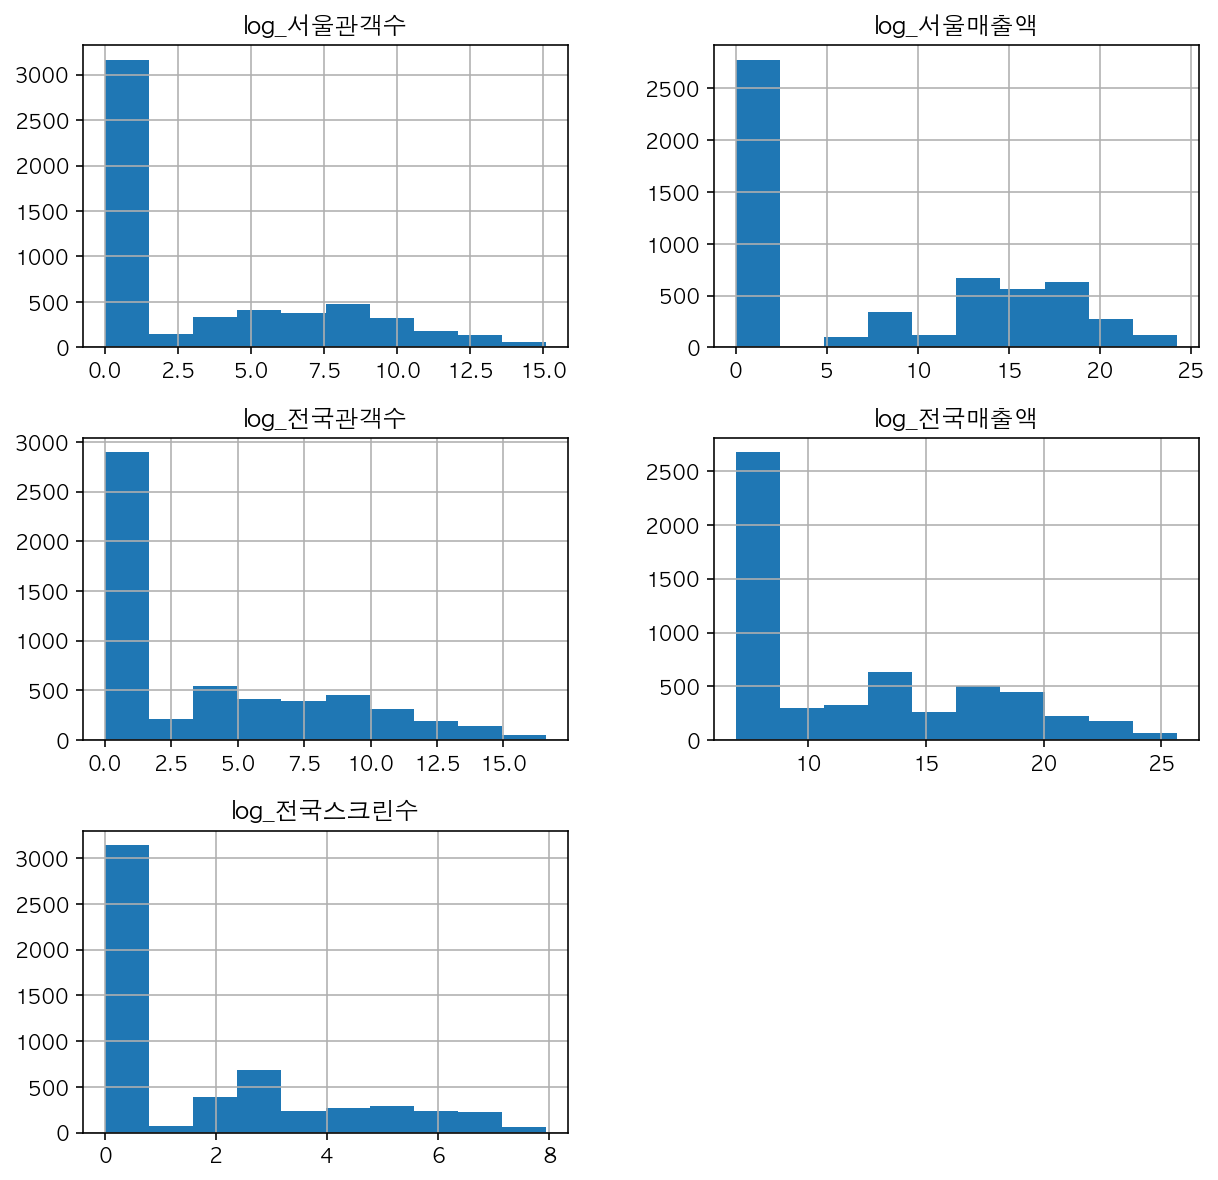

In [218]:
# log로 한번 스케일링한 히스토그램

int_data.hist(figsize=(10,10))
plt.show()

##### 이슈 2) 편차가 너무 커서, 특정 기준(스크린 수를 일정 개수 이상 할당받은 영화)으로 선별해서 데이터 사용

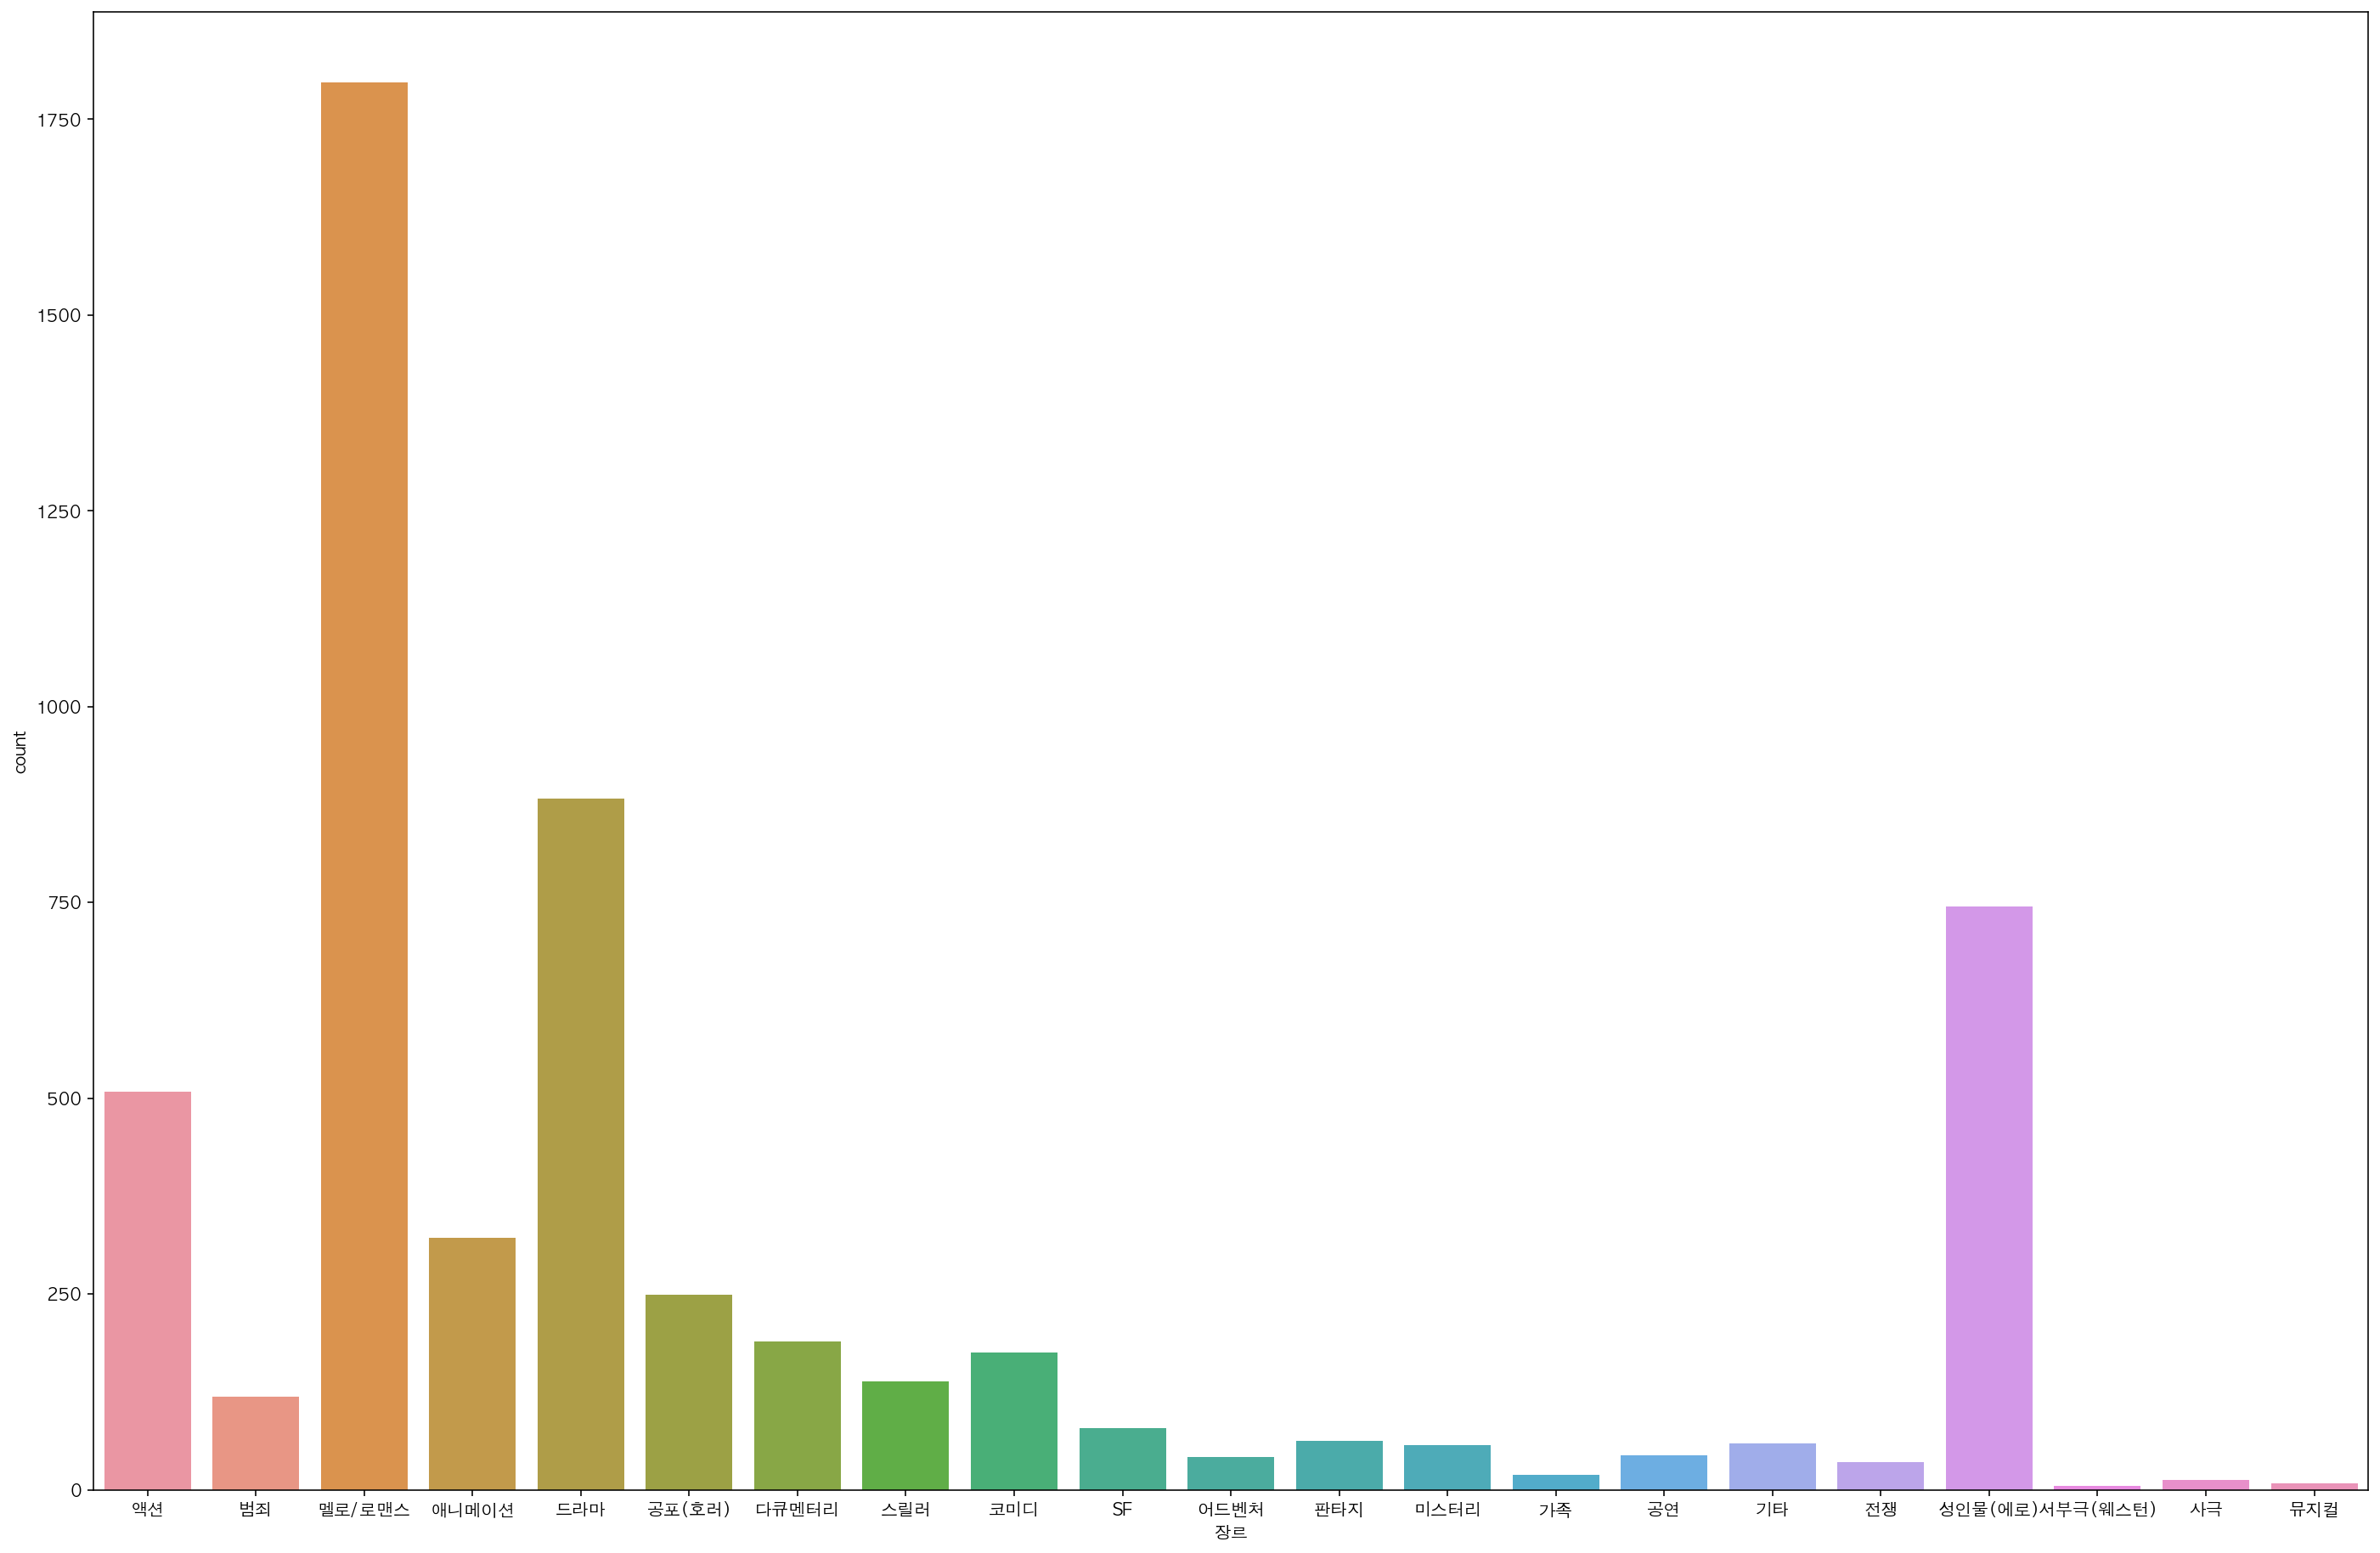

In [185]:
# 카테고리변수 - 장르

genre_data = movie_data['장르'].reset_index().drop('index', axis=1)
plt.figure(figsize=(24,16))
sns.countplot(x='장르', data=genre_data)
plt.show()

###### 이슈 3) 카테고리 데이터로 더미 변수화해서 사용한다 

In [222]:
# 카테고리 변수 - 배급사

len(movie_data['배급사'].unique())movie_data['배급사'].unique()

449

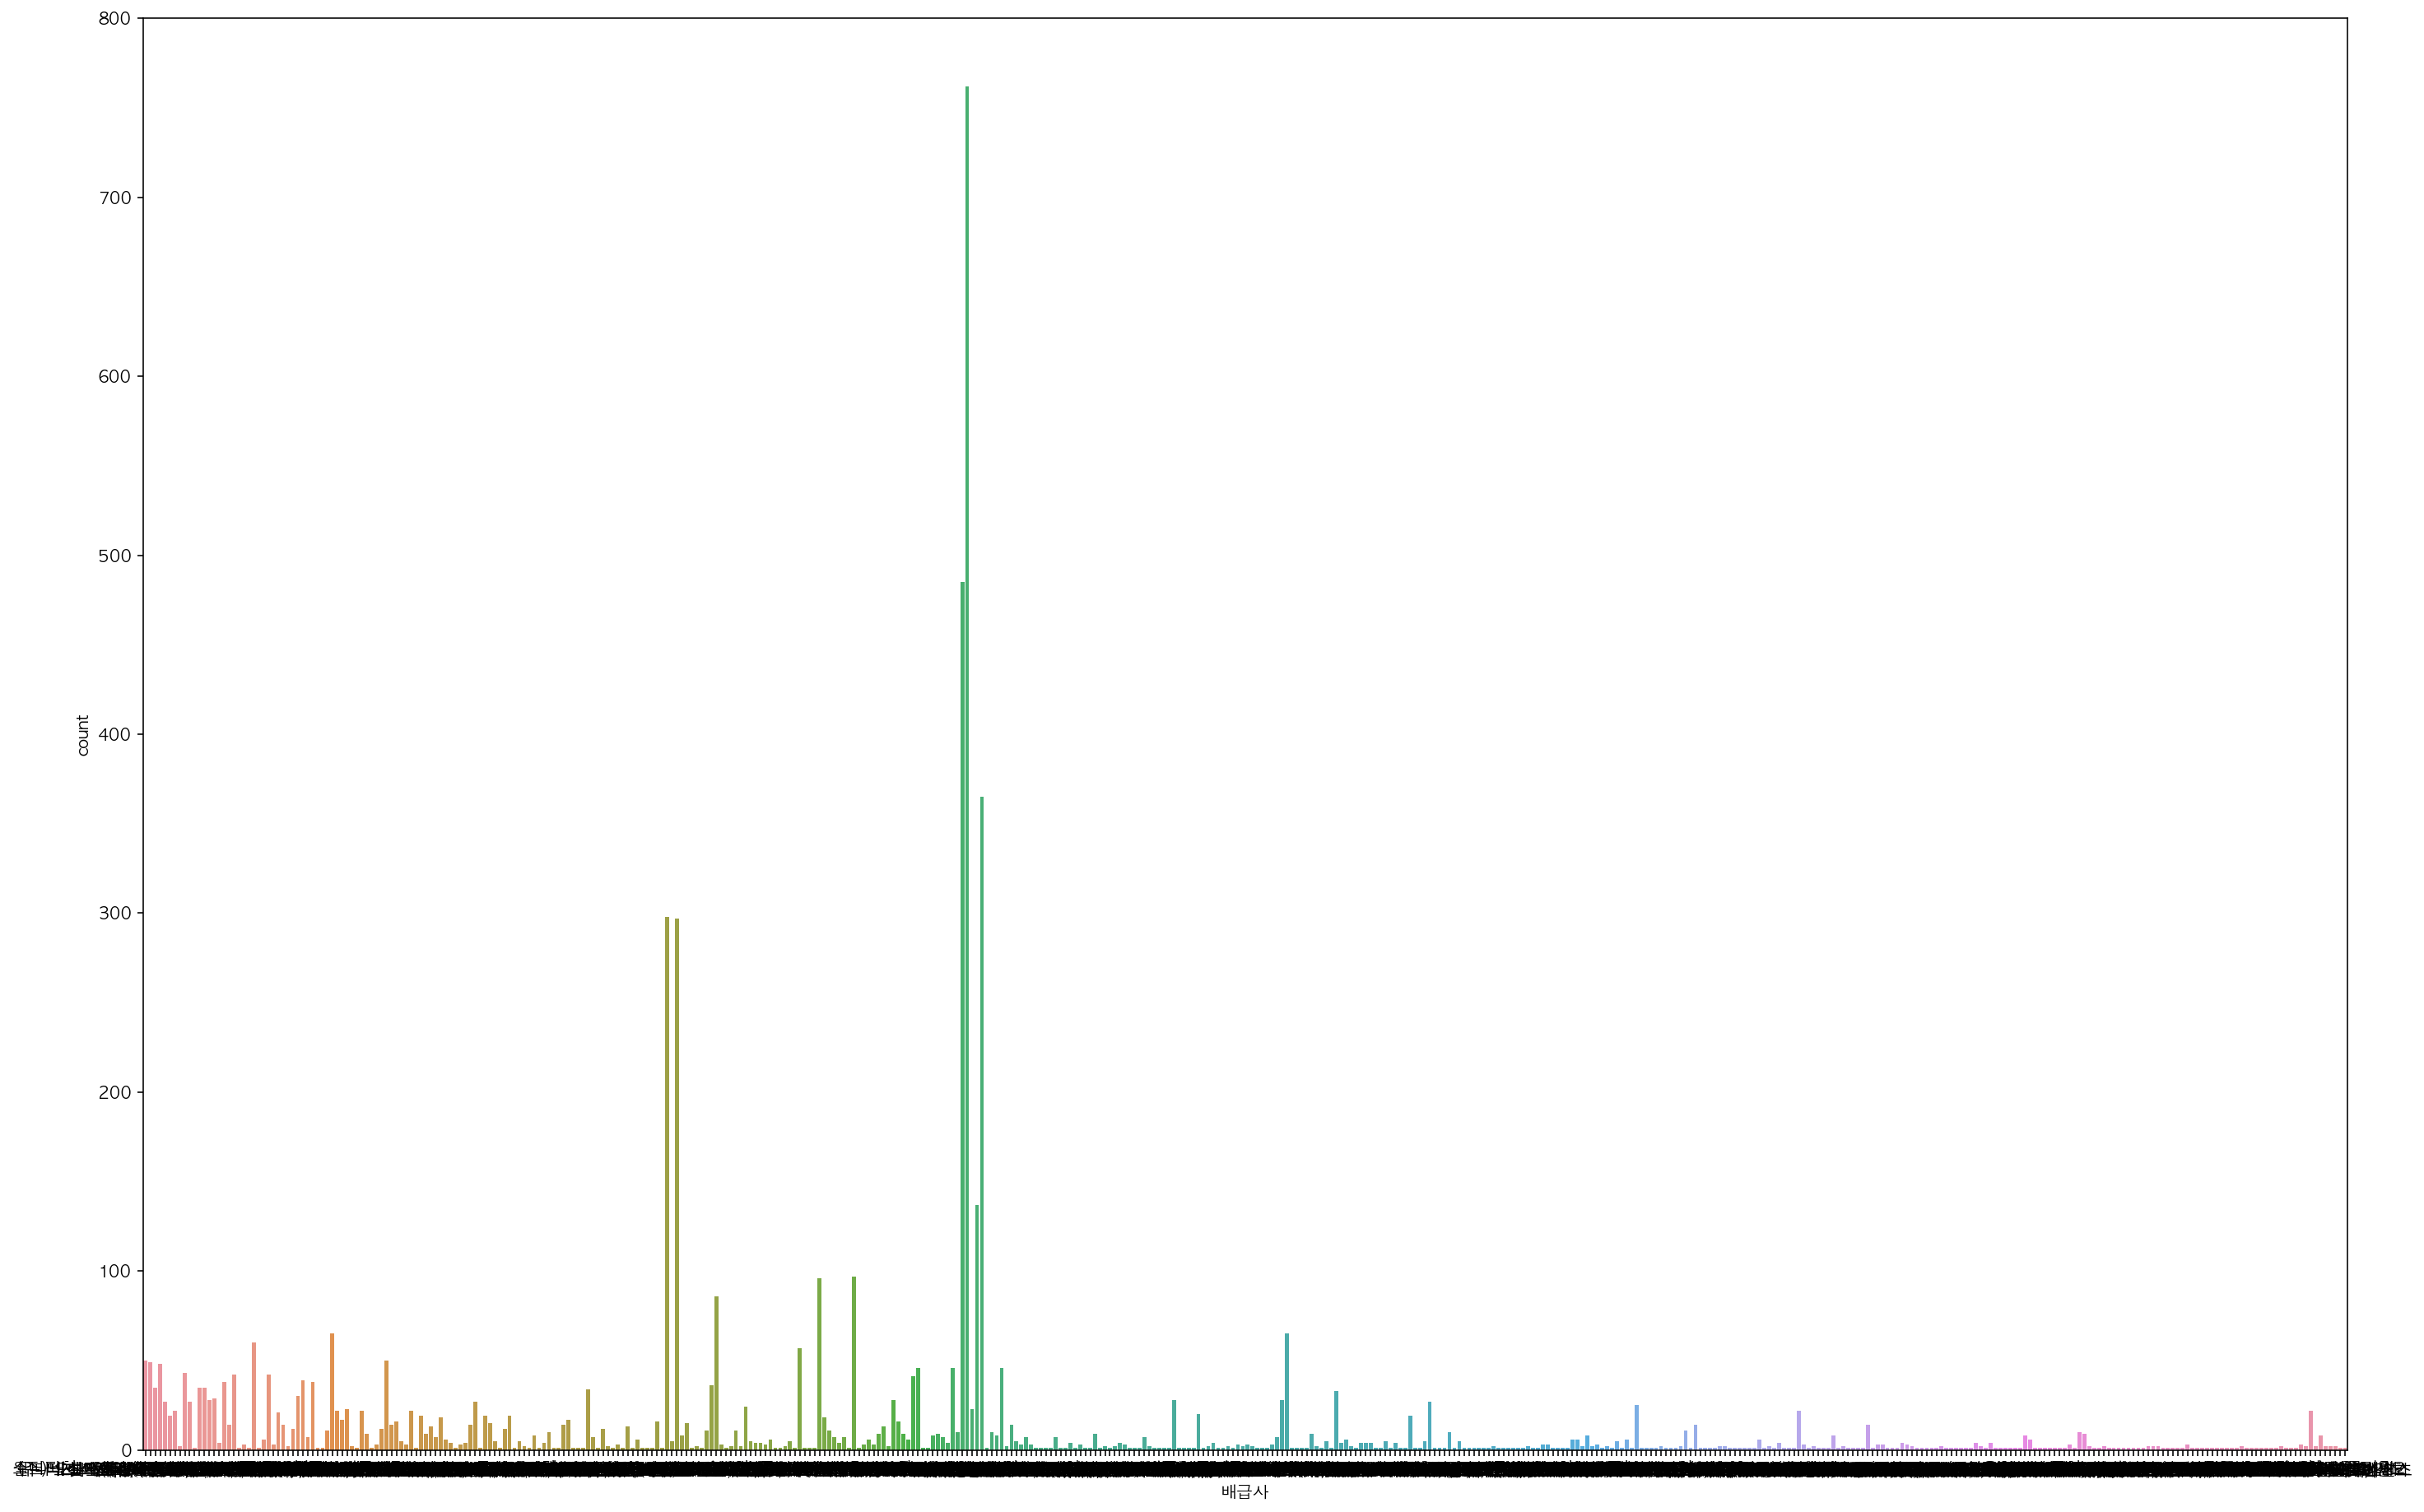

In [295]:
dist_data = movie_data['배급사'].reset_index().drop('index', axis=1)
plt.figure(figsize=(24,16))
sns.countplot(x='배급사', data=dist_data)
plt.show()

###### 이슈 4) 배급사는 최근 3년간 흥행요소(관객수 기준)로 수치화하여 사용 예정

In [296]:
# 상위 10등 배급사

dist_data['count'] = 1
dist_data = dist_data.groupby('배급사').size().reset_index()

In [305]:
dist_data = dist_data.rename(columns={0:'count'})
dist_data_top10 = dist_data.sort_values('count', ascending=False).head(10).reset_index().drop('index', axis=1)
dist_data_top10

,배급사,count
0,(주)도키엔터테인먼트,762
1,(주)영진크리에이티브,485
2,(주)영화사가을,365
3,(주)케이알씨지,298
4,(주)소나무픽쳐스,297
5,(주)플라이어,137
6,(유)조이앤시네마,97
7,스마일컨텐츠,96
8,(주)컨텐츠 빌리지,86
9,(주)팝엔터테인먼트,65


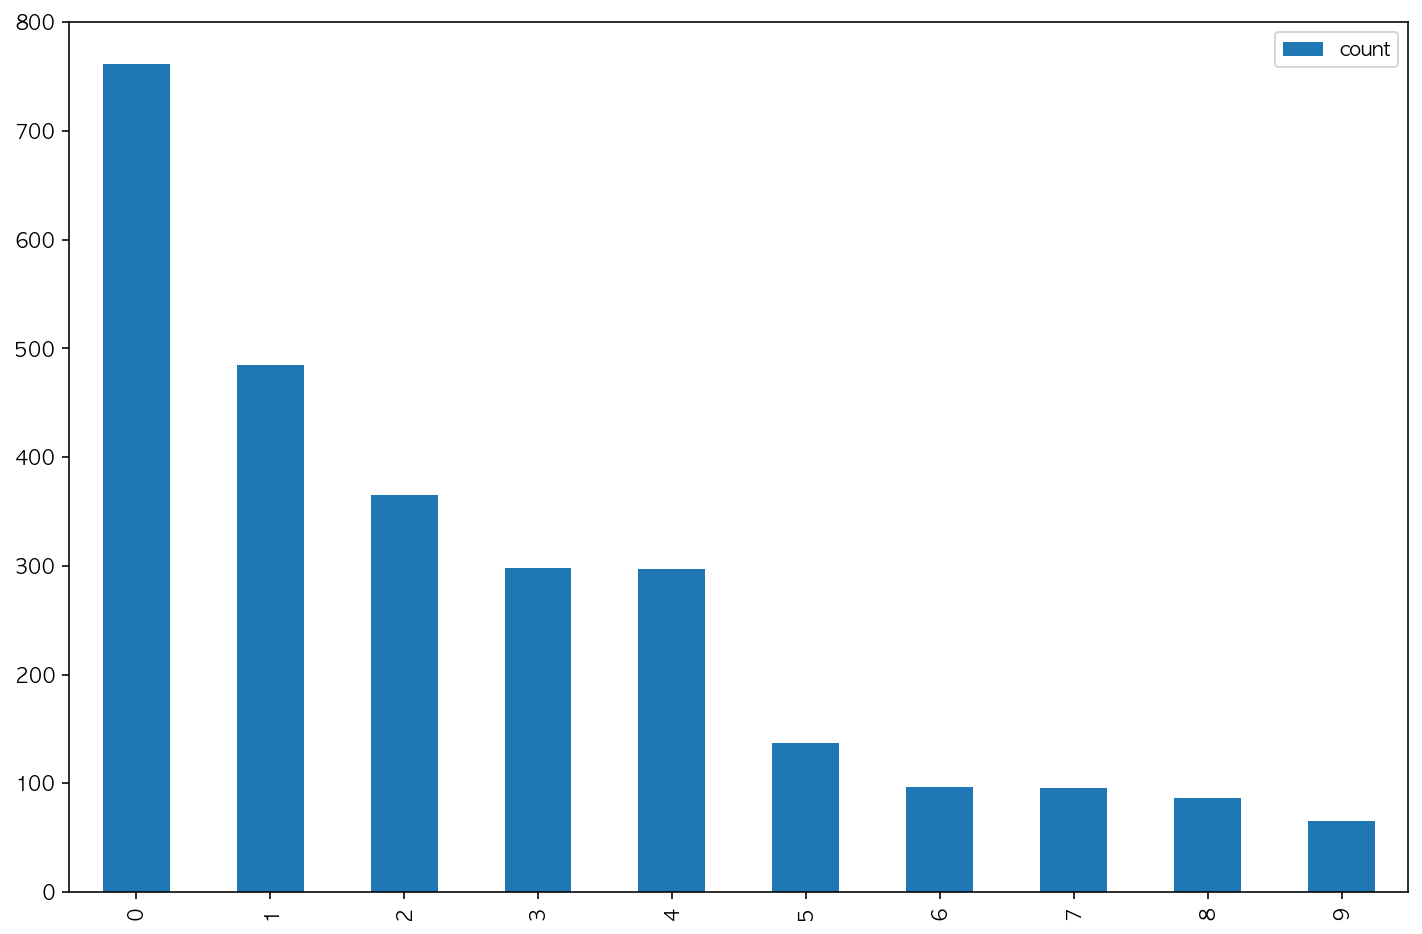

In [371]:
# plt.figure(figsize=(20,12))
# plt.plot(list(dist_data_top10['배급사']), dist_data_top10['count'])
dist_data_top10.plot(kind='bar', figsize=(12, 8))
# dist_data_top10_bar.set_xticks(list(dist_data_top10['배급사'].values))
plt.show()

In [357]:
list(dist_data_top10['배급사'].values)

list

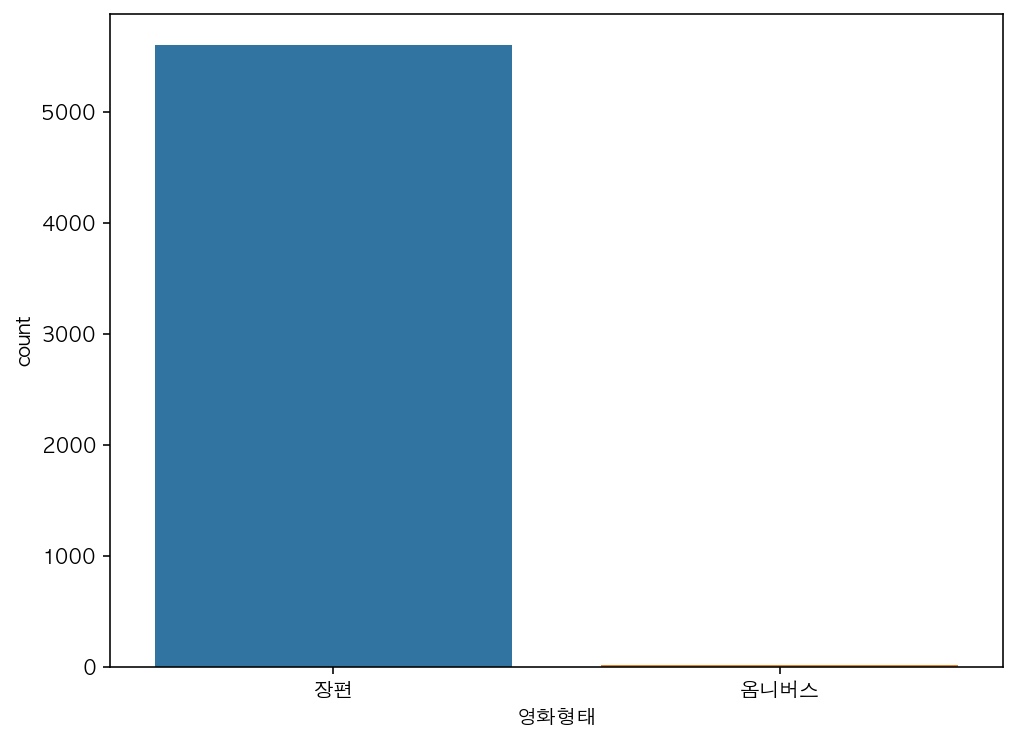

In [219]:
# 카테고리 변수 - 영화형태

type_data = movie_data['영화형태'].unique()
type_data = movie_data['영화형태'].reset_index().drop('index', axis=1)
plt.figure(figsize=(8,6))
sns.countplot(x='영화형태', data=type_data)
plt.show()

###### 이슈 5) 옴니버스가 거의 없어서 컬럼에서 삭제할 예정

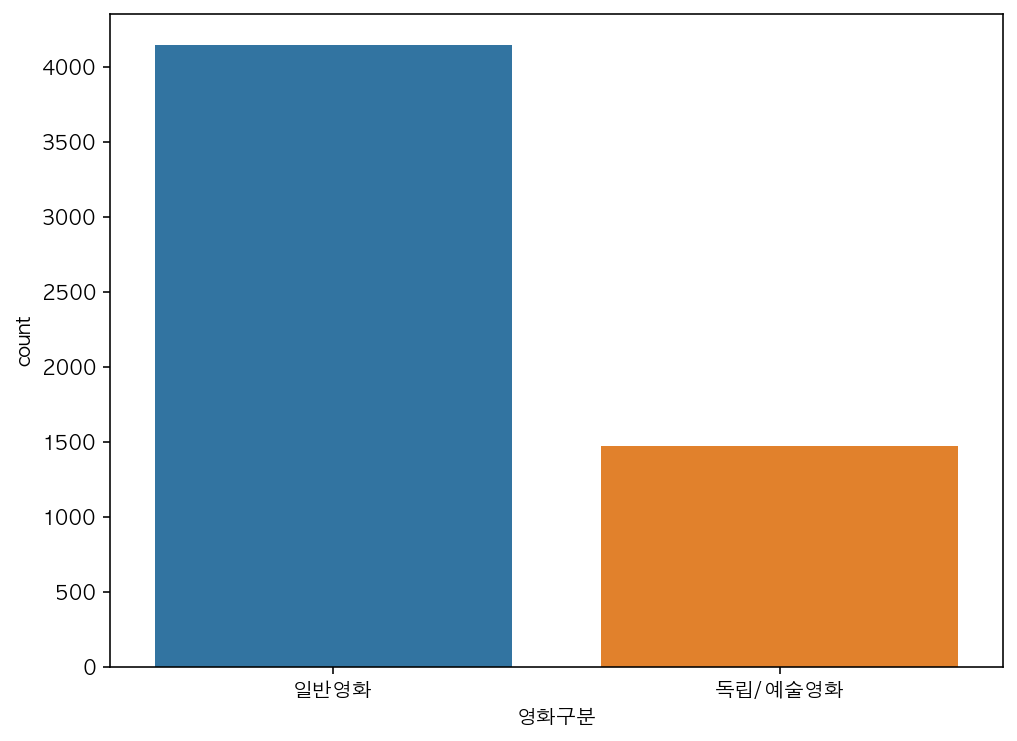

In [192]:
# 카테고리 변수 - 영화구분

division_data = movie_data['영화구분'].reset_index().drop('index', axis=1)
plt.figure(figsize=(8,6))
sns.countplot(x='영화구분', data=division_data)
plt.show()

###### 이슈 6) 일반영화와 독립/예술 영화 사이의 기준이 불명확해서 다시 분석 후 사용여부를 결정할 예정

### 참고문헌
- 뉴스 기사
    - https://news.mt.co.kr/mtview.php?no=2019112914134099089
- 논문
    - 기계학습 기반의 영화흥행예측 방법 비교(권신혜 외 2명, 2017, http://journal.hsst.or.kr/DATA/pdf/v7_4_56.pdf)
- 블로그/사이트
    - What makes a movie hit a “jackpot”? Learning from data with Multiple Linear Regression\
    (https://towardsdatascience.com/what-makes-a-movie-hit-a-jackpot-learning-from-data-with-multiple-linear-regression-339f6c1a7022)
    -  2012년도~2015년도 영화 관객수분석(https://www.slideshare.net/ssuserd3e02e/ss-51425528)
    - 영화 관객 수 예측 모델링(https://tmdrb0707.github.io/machine%20learning%20using%20r/2019/06/20/bigcontest.html)